#Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [1]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd
from IPython.external import mathjax; mathjax.install_mathjax()

/home/sadat/.ipython/nbextensions/mathjax/MathJax.js already exists


0

##Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [2]:
#Nested Loops

import numpy as np

def loop_dot(x,y):
    x=np.array(x)
    y=np.array(y)        
    z=[]
    #Number of rows in x is equal to the number of rows in y
    for xj in range(np.shape(x)[0]):            
        #Repeat operation for each column of y
        row=[]
        for yi in range(np.shape(y)[1]):
            row.append(np.sum(x[xj]*y[:,yi]))
        z.append(row)
    return z

A=[[3,5,9],[3,3,4],[5,9,17]]
B=[[2],[1],[4]]
C=loop_dot(A,B)
print C

[[47], [25], [87]]


In [3]:
#Numpy

def numpy_dot(x,y):
    return np.dot(x,y)

print numpy_dot(A,B)

[[47]
 [25]
 [87]]


Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

N1
N2
N3
N4
L1
L2
L3
L4


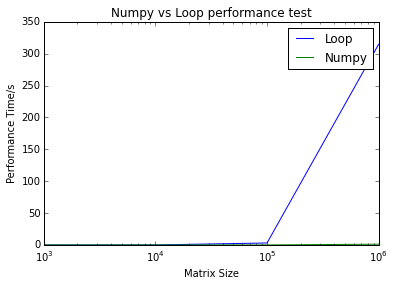

In [12]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import time

def genRand(a,b,c):
    '''Generate random matrix of x by x dimensions'''
    mat1=[[randint(0,9) for i in range(a)] for i in range(b)]
    mat2=[[randint(0,9) for i in range(b)] for i in range(c)]
    return mat1, mat2

loopTime=[]
numpyTime=[]

#Numpy calculations
numpyTime.append(time.time())
print 'N1'
A,B=genRand(10,10,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print 'N2'
A,B=genRand(10,100,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print 'N3'
A,B=genRand(10,1000,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print 'N4'
A,B=genRand(10,10000,10)
numpy_dot(A,B)
numpyTime.append(time.time())
numpyTime=np.diff(numpyTime)

#Loop calculations
loopTime.append(time.time())
print 'L1'
A,B=genRand(10,10,10)
loop_dot(A,B)
loopTime.append(time.time())
print 'L2'
A,B=genRand(10,100,10)
loop_dot(A,B)
loopTime.append(time.time())
print 'L3'
A,B=genRand(10,1000,10)
loop_dot(A,B)
loopTime.append(time.time())
print 'L4'
A,B=genRand(10,10000,10)
loop_dot(A,B)
loopTime.append(time.time())
loopTime=np.diff(loopTime)

#Matrix size
matSize=[1e3,1e4,1e5,1e6]

#Generate plot
%matplotlib inline
plt.plot(matSize,loopTime)
plt.plot(matSize,numpyTime)
plt.xscale('log')
plt.legend(['Loop','Numpy'])
plt.xlabel('Matrix Size')
plt.ylabel('Performance Time/s')
plt.title('Numpy vs Loop performance test')
plt.show()


**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

###IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. Tuple
2. Set

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [9]:
import pickle
import gzip

#Save datatypes
datatypes={
    'object':'dictionary',
    'array':'list',
    'string':'string',
    'integer':'integer',
    'realnumber':'float',
    'true':'True',
    'false':'False',
    'null':'None'
}

#Save as pickle and gunzip
pickle.dump(datatypes,gzip.open('HW2_Q3.pkl','wb'),2)

#Load gzip pickle file
output=pickle.load(gzip.open('HW2_Q3.pkl','rb'))

#Print contents
for key in datatypes:
    print 'The JSON equivalent for the Python datatype %s is %s'%(key, datatypes[key])
    
#Reverse dictionary
reverse_datatypes={}
for key in datatypes:
    reverse_datatypes[datatypes[key]]=key

print '\n Reversing the key-value pair of datatypes:'
print reverse_datatypes

The JSON equivalent for the Python datatype null is None
The JSON equivalent for the Python datatype false is False
The JSON equivalent for the Python datatype string is string
The JSON equivalent for the Python datatype integer is integer
The JSON equivalent for the Python datatype array is list
The JSON equivalent for the Python datatype object is dictionary
The JSON equivalent for the Python datatype true is True
The JSON equivalent for the Python datatype realnumber is float

 Reversing the key-value pair of datatypes:
{'None': 'null', 'False': 'false', 'string': 'string', 'dictionary': 'object', 'float': 'realnumber', 'list': 'array', 'integer': 'integer', 'True': 'true'}


##Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


###Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [1]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [3]:
import os

#!mkdir data
file = open('.gitignore', 'w')
file.write(r'/data/')
file.close()

/home/sadat/Documents/DSE/ssnazrul/DSE200/day_2_github_io_numpy_pandas


Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

Give answers to questions 1-4 in this markdown cell:

1. 
2. 
3. 
4. 

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [ ]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

###Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

 #### Pandas excercises
 1. Selecting a subset of the rows using a condition
 1. Using Apply
 2. Different referencing of cells in dataframe: .log .iloc .ix direct
 2. Using multi-indexes, pivoting, stack unstack
 3. Using Groupby
 4. Pandas and matplotlib.